## Loan Application Status Prediction
##### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

WE have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')


In [37]:
df = pd.read_csv("loan_application.csv")

In [38]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Obsarvation:-
1. Count of different numeric value columns are different it indicate that null/missine value exist in all columns.

<AxesSubplot:>

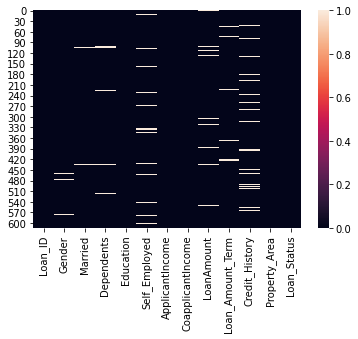

In [40]:
import seaborn as sns
sns.heatmap(df.isnull())

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Observation:-
1. Most of the columns has missing/Null values. 
2. For Gender,Married,Dependents,Self_Employed,Loan_Amount_Term field,Credit_History we will replace missing value with mode of the column.
3. LoanAmount will check wheather we use mean or median to replace missing values.


## Filling missing value with mode of the columns .

In [42]:
from sklearn.impute import SimpleImputer 
imp = SimpleImputer(strategy="most_frequent")
columns = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
for i in columns:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    


<AxesSubplot:>

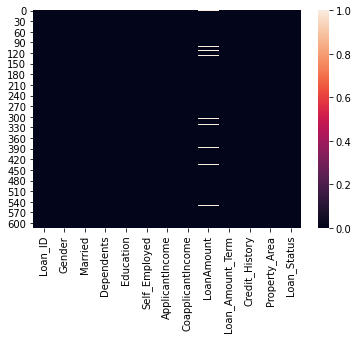

In [43]:
sns.heatmap(df.isnull())


In [44]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

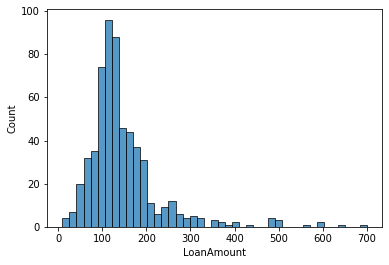

In [34]:
sns.histplot(data=df,x='LoanAmount')

## Observation:- 
1. Loan amount has some skewness, hence we will us median to replace missing values.

In [45]:
imp = SimpleImputer(missing_values=np.nan,strategy="median")
df["LoanAmount"]=imp.fit_transform(df["LoanAmount"].values.reshape(-1,1))

<AxesSubplot:>

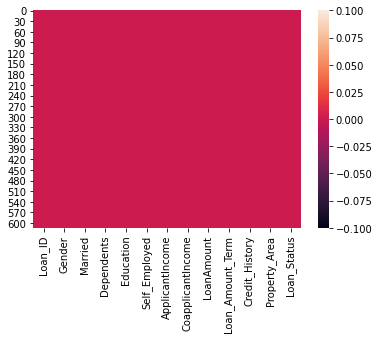

In [46]:
sns.heatmap(df.isnull())

## Observation:-
No Null value prasent in dataset now.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Observation:-
Dependent column is showing as string data type because it has 3+ dependent for some applicant.

### EDA

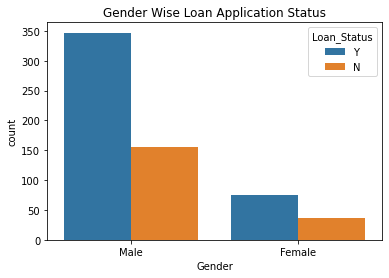

In [56]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
plt.title("Gender Wise Loan Application Status")
plt.show()

### Observation:-
1. Higest loan application place by Male applicatan.
2. Female applicants are very less, 
3. Male applicant's around 30% loan application rejected.

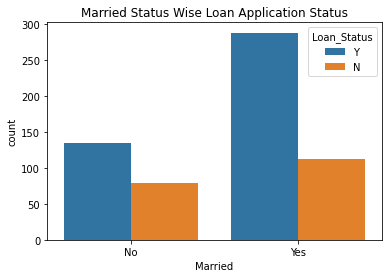

In [57]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
plt.title("Married Status Wise Loan Application Status")
plt.show()

### Observation:-
1. Married Applicant get loan easyly .

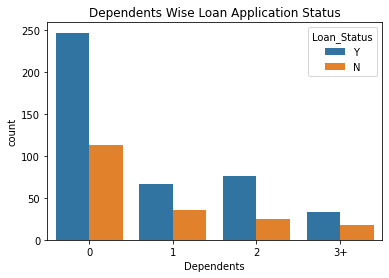

In [58]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
plt.title("Dependents Wise Loan Application Status")
plt.show()

### Observation:-
1. Loan applicant who has no dependent request loan comparatily more and approval ratio is also high for such applicant.
2. almost 50% of application rejected which has 1 or more dependent.
3. applicant having 0 or 2 dependent has low rejection ratio.

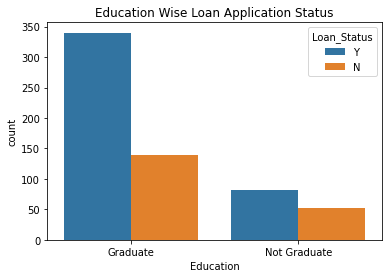

In [59]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
plt.title("Education Wise Loan Application Status")
plt.show()

### Observation:-
1. Maximum applicant are graduate.
2. Rejection in Non-Graduate applicat is very high.

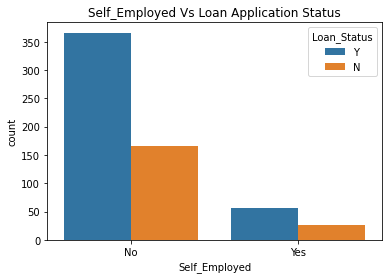

In [60]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
plt.title("Self_Employed Vs Loan Application Status")
plt.show()

## Observation:-

count of applicant who are Self-employed is very low as compare to working/salaried applicant. 

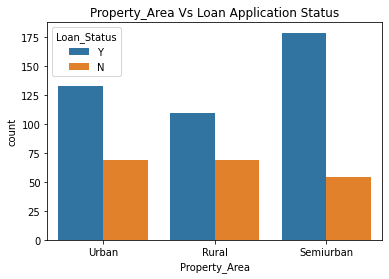

In [61]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
plt.title("Property_Area Vs Loan Application Status")
plt.show()

## Observation:-
1. People leaving in samiurban urban area request for loan mostly.
2. Rejection of application belongs to Rural area is high. 

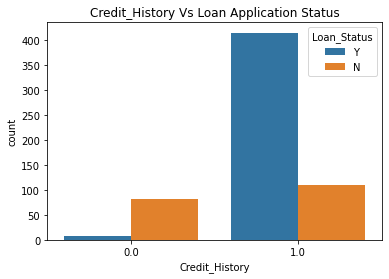

In [62]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
plt.title("Credit_History Vs Loan Application Status")
plt.show()

### Observation:- 
1. application rejection is higest for People with no cradit history, 
2. people who has their credit history has high chance of getting loan approved.

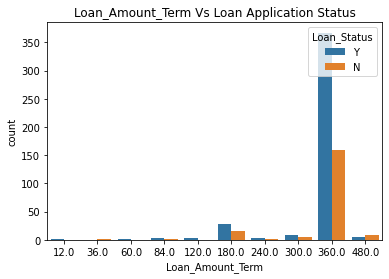

In [63]:
sns.countplot(x='Loan_Amount_Term',data=df,hue='Loan_Status')
plt.title("Loan_Amount_Term Vs Loan Application Status")
plt.show()

### Observation:-
1. most of the loan given for 360 Month.

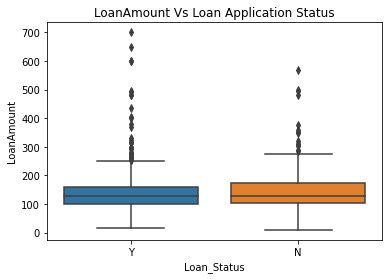

In [68]:
sns.boxplot(y='LoanAmount',data=df,x='Loan_Status')
plt.title("LoanAmount Vs Loan Application Status")
plt.show()

### Observation:-
Loan amount and Loan application staus has not direct correlation, means amount do not effect the loan application.

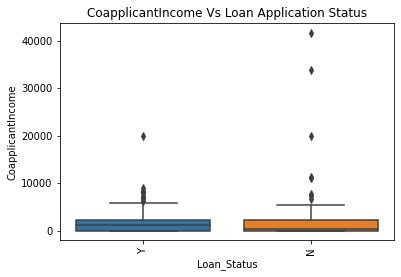

In [69]:
sns.boxplot(y='CoapplicantIncome',data=df,x='Loan_Status')
plt.title("CoapplicantIncome Vs Loan Application Status")
plt.show()

### Observation:-
CoapplicantIncome and Loan application staus has not direct correlation, means CoapplicantIncome do not effect the loan application directly..

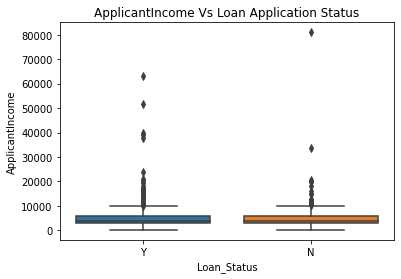

In [70]:
sns.boxplot(y='ApplicantIncome',data=df,x='Loan_Status')
plt.title("ApplicantIncome Vs Loan Application Status")
plt.show()

### Observation:-
Low income people request for loan most of the time and appliation approval or rejection has not direct relation with Income.

In [73]:
#Deleting Loan_ID column as it has all unique value.
df = df.drop(['Loan_ID'], axis = 1)

In [77]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Encoding Categorical Features.

In [79]:
#### Encoding Gender categrical Features: ##########
df['Gender'] = pd.Categorical(df['Gender'])
dfDummies_Gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
df = pd.concat([df, dfDummies_Gender], axis=1)
df.drop(columns="Gender",inplace=True)
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [80]:
#### Encoding Married categrical Features: ##########
df['Married'] = pd.Categorical(df['Married'])
dfDummies_Married = pd.get_dummies(df['Married'], prefix = 'Married')
df = pd.concat([df, dfDummies_Married], axis=1)
df.drop(columns="Married",inplace=True)
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes
0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0


In [81]:
#### Encoding Married categrical Features: ##########
df['Dependents'] = pd.Categorical(df['Dependents'])
dfDummies_Dependents = pd.get_dummies(df['Dependents'], prefix = 'Dependents')
df = pd.concat([df, dfDummies_Dependents], axis=1)
df.drop(columns="Dependents",inplace=True)
df.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0
1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0,0
2,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0
3,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0
4,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0


In [82]:
#### Encoding Education categrical Features: ##########
df['Education'] = pd.Categorical(df['Education'])
dfDummies_Education = pd.get_dummies(df['Education'], prefix = 'Education')
df = pd.concat([df, dfDummies_Education], axis=1)
df.drop(columns="Education",inplace=True)
df.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate
0,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0
1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0,0,1,0
2,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,1,0
3,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,0,1
4,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0


In [83]:
#### Encoding Self_Employed categrical Features: ##########
df['Self_Employed'] = pd.Categorical(df['Self_Employed'])
dfDummies_Self_Employed = pd.get_dummies(df['Self_Employed'], prefix = 'Self_Employed')
df = pd.concat([df, dfDummies_Self_Employed], axis=1)
df.drop(columns="Self_Employed",inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0,1,0
1,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,1,0,1,0,0,1,0,1,0
2,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,1,1,0,0,0,0,1,1,0
4,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0,0,0,1,0,1,0


In [84]:
#### Encoding Property_Area categrical Features: ##########
df['Property_Area'] = pd.Categorical(df['Property_Area'])
dfDummies_Property_Area = pd.get_dummies(df['Property_Area'], prefix = 'Property_Area')
df = pd.concat([df, dfDummies_Property_Area], axis=1)
df.drop(columns="Property_Area",inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [85]:
#### Encoding Loan_Amount_Term categrical Features: ##########
df['Loan_Amount_Term'] = pd.Categorical(df['Loan_Amount_Term'])
dfDummies_Loan_Amount_Term = pd.get_dummies(df['Loan_Amount_Term'], prefix = 'Loan_Amount_Term')
df = pd.concat([df, dfDummies_Loan_Amount_Term], axis=1)
df.drop(columns="Loan_Amount_Term",inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,5849,0.0,128.0,1.0,Y,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4583,1508.0,128.0,1.0,N,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3000,0.0,66.0,1.0,Y,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,2583,2358.0,120.0,1.0,Y,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,6000,0.0,141.0,1.0,Y,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [86]:
#### Encoding Credit_History categrical Features: ##########
df['Credit_History'] = pd.Categorical(df['Credit_History'])
dfDummies_Credit_History = pd.get_dummies(df['Credit_History'], prefix = 'Credit_History')
df = pd.concat([df, dfDummies_Credit_History], axis=1)
df.drop(columns="Credit_History",inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0
0,5849,0.0,128.0,Y,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,N,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,3000,0.0,66.0,Y,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,2583,2358.0,120.0,Y,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,6000,0.0,141.0,Y,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [87]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status']) 
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_0.0,Credit_History_1.0
0,5849,0.0,128.0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,3000,0.0,66.0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
3,2583,2358.0,120.0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
4,6000,0.0,141.0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## Observation:-
All Catagorical column has been encoded in numarical 0 or 1 value.

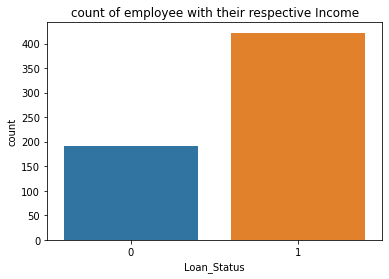

In [94]:
sns.countplot(df['Loan_Status'])
plt.title("count of employee with their respective Income")
plt.show()

## Observation:-
Data has difference but it is not very much imbalance.

In [89]:
corr_matrix = df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History_1.0         0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education_Graduate         0.085884
Dependents_2               0.062384
Loan_Amount_Term_360.0     0.054963
Loan_Amount_Term_120.0     0.047264
Loan_Amount_Term_60.0      0.038560
Loan_Amount_Term_12.0      0.027244
Gender_Male                0.017987
Loan_Amount_Term_240.0     0.010953
Loan_Amount_Term_84.0      0.010953
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Loan_Amount_Term_180.0    -0.016904
Gender_Female             -0.017987
Loan_Amount_Term_300.0    -0.022814
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Loan_Amount_Term_36.0     -0.084751
Education_Not Graduate    -0.085884
Married_No                -0

### Observation:-
Credit history and Property Area are two fector which has correlation with Loan Status. if credit historyu is yes hen chances of getting approval is much high.
Credit_History_0.0 has same high negative correlation because it indicate that if person has no credit history then chances of his application rejection will be much.

# Split x and y

In [106]:
x = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

Scaling the data before pushing it into model.

In [107]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
column = x.columns
x = scale.fit_transform(x)
x = pd.DataFrame(x,columns=column)

## check for Best Random State

In [186]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = f1_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.9125 on Random_state 183


In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=183)

In [188]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=183)

### Logistic Regression 

In [189]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f1_score(y_test,predlr))
#print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.9125
[[ 29  25]
 [  3 146]]
              precision    recall  f1-score   support

           0       0.91      0.54      0.67        54
           1       0.85      0.98      0.91       149

    accuracy                           0.86       203
   macro avg       0.88      0.76      0.79       203
weighted avg       0.87      0.86      0.85       203



### Cross Validation Logistic Regression

In [190]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x,y,scoring='f1',cv=4)   #cv for 5 split 
print("Corss validation scre for LOgistic regression", scr.mean())

Corss validation scre for LOgistic regression 0.8716084601756153


### AUC ROC CURVE Logistic Regression

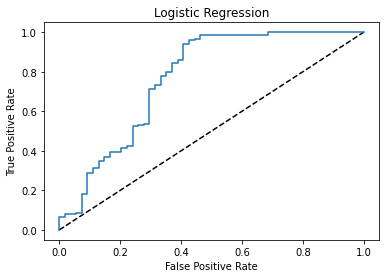

In [191]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=LR.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

### Random Forest Classifier Model

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(f1_score(y_test,predrf))
#print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8802588996763754
[[ 30  24]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        54
           1       0.85      0.91      0.88       149

    accuracy                           0.82       203
   macro avg       0.77      0.73      0.75       203
weighted avg       0.81      0.82      0.81       203



### Random  Forest Cross Validation 

In [193]:
scr = cross_val_score(rf,x,y,scoring='f1',cv=4)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.8522367052254842


### AUC ROC CURVE Random Forest Classification

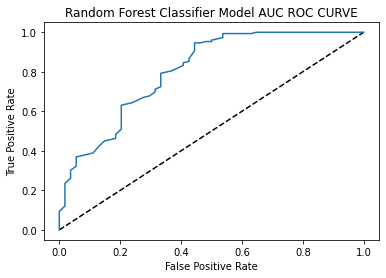

In [194]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier Model AUC ROC CURVE")
plt.show()

### K Nearest Neighbors Classifier

In [195]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(f1_score(y_test,predknn))
#print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8562091503267973
[[ 28  26]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        54
           1       0.83      0.88      0.86       149

    accuracy                           0.78       203
   macro avg       0.72      0.70      0.71       203
weighted avg       0.77      0.78      0.78       203



### KNN Cross Validation

In [196]:
scr = cross_val_score(knn,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for Knearest Neigbour Classification", scr.mean())

Corss validation scre for Knearest Neigbour Classification 0.8540976412025634


### AUC ROC CURVE

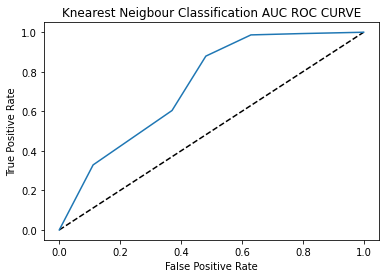

In [197]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Knearest Neigbour Classification AUC ROC CURVE")
plt.show()

### Support Vactor Machine Classification Model

In [198]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(f1_score(y_test,predsv))
#print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.906832298136646
[[ 27  27]
 [  3 146]]
              precision    recall  f1-score   support

           0       0.90      0.50      0.64        54
           1       0.84      0.98      0.91       149

    accuracy                           0.85       203
   macro avg       0.87      0.74      0.77       203
weighted avg       0.86      0.85      0.84       203



## Cross Validation SVC

In [199]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(sv,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8739366021338052


## AUC ROC CURVE FOR SVC

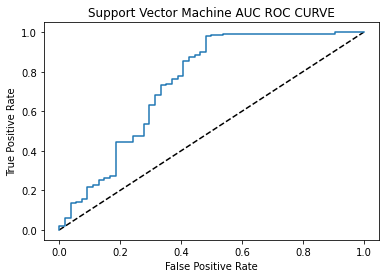

In [200]:
model = SVC()
model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine AUC ROC CURVE")
plt.show()

### Adaboost Classifier Model

In [201]:
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(f1_score(y_test,predad))
#print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8938906752411575
[[ 31  23]
 [ 10 139]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        54
           1       0.86      0.93      0.89       149

    accuracy                           0.84       203
   macro avg       0.81      0.75      0.77       203
weighted avg       0.83      0.84      0.83       203



### Cross validation Adaboos Classifier Model

In [202]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ad,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8499081767990374


## Adaboos Classifier Model AUC ROC CURVE

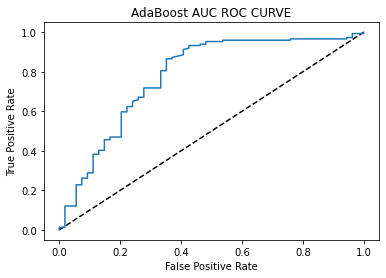

In [203]:
model = AdaBoostClassifier()
model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost AUC ROC CURVE")
plt.show()

### Decision Tree Classification Model

In [204]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print(f1_score(y_test,preddt))
#print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))   
print(classification_report(y_test,preddt))

0.8395904436860069
[[ 33  21]
 [ 26 123]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58        54
           1       0.85      0.83      0.84       149

    accuracy                           0.77       203
   macro avg       0.71      0.72      0.71       203
weighted avg       0.78      0.77      0.77       203



### Cross Validation for Decision Tree Classification Model

In [205]:
scr = cross_val_score(dt,x,y,scoring="f1",cv=4)   #cv for 5 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.7628960413936395


### AUC ROC Curve for DTC

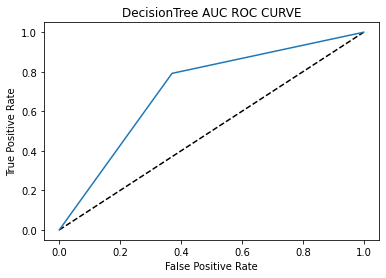

In [206]:
model = DecisionTreeClassifier()
#model.probability = True
model.fit(x_train,y_train)
y_pred_prob=model.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DecisionTree AUC ROC CURVE")
plt.show()

Best Model is KNN because its cross validation score and F1 score difference is lowest.

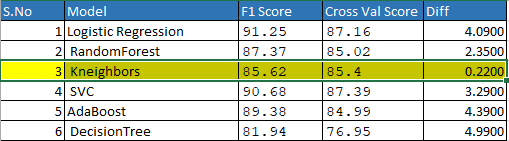

## Hyper Parameter tuning for KNN Classification Model.

In [207]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=183)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier(n_neighbors=5)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
knn_random = GridSearchCV(knn, param_grid , cv = 4, verbose=2, scoring='f1', n_jobs = -1)
# Fit the random search model

result=knn_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
Best Score: 0.8577506802863907
Best Hyperparameters: {'n_neighbors': 12, 'weights': 'uniform'}


### So we have some improvment in f1 score when using n_neighbors 12.

### Saving Best Model

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=12,weights = 'uniform' )
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(f1_score(y_test,predknn))
#print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.891640866873065
[[ 24  30]
 [  5 144]]
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        54
           1       0.83      0.97      0.89       149

    accuracy                           0.83       203
   macro avg       0.83      0.71      0.73       203
weighted avg       0.83      0.83      0.81       203



In [209]:
import joblib 
joblib.dump(rf,'Loan_application_status.pki')

['Loan_application_status.pki']

In [210]:
model = joblib.load('Loan_application_status.pki')

In [211]:
prediction = model.predict(x_test)

In [212]:
prediction = pd.DataFrame(prediction)

In [213]:
prediction.to_csv('Result.csv')